# 5. Differentialgleichungen 1. und 2. Ordnung

In [61]:
from sympy import *
from sympy import Derivative as d
init_printing()

In [62]:
y=Function('y')
x=Symbol('x')
z=Symbol('z')

## 5.1 Gleichungen 1. Ordnung
### 5.1.1 Trennung der Veranderlichen

In [63]:
from sympy import *
from sympy import Derivative as d
init_printing()

In [64]:
x=Symbol('x')
y=Symbol('y')

$$y''=7x^2e^{-y}$$

In [65]:
gleichung=Eq(d(y(x)),7*x**2/E**y(x))

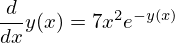

In [66]:
gleichung

Wir trennen die Veränderlichen:
$$ \frac{dx}{dy}=7x^2e^{-y(x)} $$
$$ e^ydy=7x^2dx $$
und integrieren beide Seiten:

In [67]:
integrate(E**y,y)

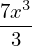

In [68]:
r=integrate(7*x**2,x)
r

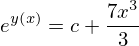

In [69]:
y=Function('y')
c=Symbol('c')
fin=Eq(E**y(x),r+c)
fin

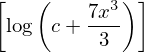

In [70]:
solve(fin,y(x))

Überprüfung:

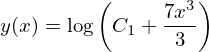

In [71]:
dsolve(gleichung)

### 5.1.2 Integrations Faktor

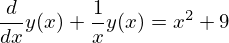

In [72]:
y=Function('y')
c=Symbol('c')
x=Symbol('x')

gl=Eq(d(y(x))+y(x)/x,x**2+9)
gl

Integrationsfaktor:

In [73]:
ifa=E**(integrate(1/x,x))
ifa

Nach Transofrmierungen wir becommen:
$$(xy)'=x*(x^2+9)$$
$$(xy)'=(x^3+9x)$$
Wir integrieren beide Seiten:
$$\int{(xy)'}=xy$$

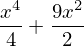

In [74]:
ii=integrate((x**3+9*x),x)
ii

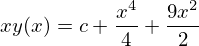

In [75]:
ii=ii+c #integration

iii=Eq(x*y(x),ii)
iii

Wir teilen beide Seiten nach x:

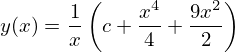

In [76]:
ii=ii/x;
iiii=Eq(y(x),ii)
iiii

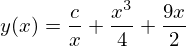

In [77]:
iiii=simplify(iiii)
iiii

Überprüfung:

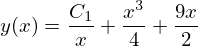

In [78]:
auto=dsolve(gl)
auto

## 5.2 Gleichungen 2. Ordnung
###  Complexen Nullstellen der charakteristischen Gleichung

$$y''+y=sin(5x) $$
$$y(0)=1$$
$$y'(0)=2$$

#### 5.2.1 Allgemeine lösung


Allgemeine Lösung: $$y''+y=0$$

In [79]:
from sympy import *
from sympy import Derivative as d
init_printing()

D=Symbol("D")
eq=D**2+1;
eq


In [80]:
roots=solve(eq)
roots

=> $$(D^2+1)y=0$$
$$(D+i)(D-i)y=0$$

Seit
$$D-\lambda_i=e^{\lambda_ix}De^{-\lambda_ix}$$
$$y=c_1e^{\lambda_1x}+c_2e^{\lambda_2x}$$

In unserem Fall,
$$y_h=c_1e^{-ix}+c_2e^{ix}$$


#### 5.2.2 Spezielle Lösung 
$$y''+y=sin(5x)$$

Von der rechte Seite, wir wissen dass $y_s(x)$ die Form $Acos(5x)+Bsin(5x)$ hat

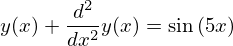

In [81]:
gl=Eq(d(d(y(x)))+y(x),sin(5*x))
gl

In [82]:
A,B=symbols("A B")
form=A*cos(5*x)+B*sin(5*x)
form

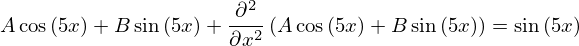

In [83]:
ddform=gl.subs(y(x),form)
ddform

In [84]:
ddform=ddform.doit()
ddform=ddform.simplify()
ddform

Daher kriegen wir den Gleichung
$$-24A=0;\\ -24B=1 \\\implies$$

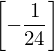

In [85]:
bb = solve(-24*B-1,B)
bb

$$A=0;B=-1/24$$
$$\implies$$
$$y_s=-\frac{1}{24}sin(5x)$$

#### 5.2.3 Lösung

$$y=y_s+y_h $$
$$y=-\frac{1}{24}sin(5x)+c_1e^{-ix}+c_2e^{ix}$$

Überprüfung:

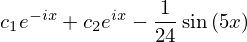

In [86]:
c1,c2=symbols("c1 c2")
full=bb[0]*sin(5*x)+c1*E**(-I*x)+c2*E**(I*x)
full

$$y''+y=sin(5x)$$

In [87]:
d(d(full,x),x).doit()+full

### Berechnung von $c_1,c_2$ 
$$y''+y=sin(5x)$$
$$y(0)=1;\\y'(0)=2$$

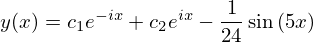

In [88]:
c1,c2=symbols("c1 c2")
full=bb[0]*sin(5*x)+c1*E**(-I*x)+c2*E**(I*x)

e1=full
Eq(y(x),e1)

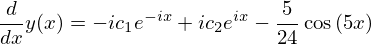

In [89]:
e2=d(e1,x).doit()
Eq(d(y(x),x),e2)

#### Teillösungen
Wir haben zwei Gleichungen. In beidem,
$$y(0)=1;\\y'(0)=2$$

In [90]:
e1=e1.subs(x,0)
eq1=Eq(e1,1)
eq1

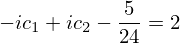

In [91]:
e2=e2.subs(x,0)
eq2=Eq(e2,2)
eq2


Wir lösen den Gleichungssystem

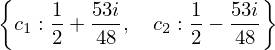

In [92]:
res=solve([eq1,eq2],[c1,c2])
res

Und für dem Fall 
$$y(0)=1;\\y'(0)=2$$
wir bekommen die Folgende $y(x)$: 

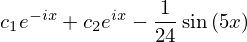

In [93]:
full

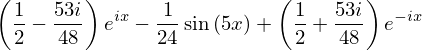

In [94]:
full=full.subs(c1,res[c1])
full=full.subs(c2,res[c2])
full

Überprüfung:

In [95]:
full.subs(x,0).simplify()

In [96]:
d(full,x).doit().subs(x,0).simplify()

### 5.2.2 Die Gleichung $y''-4y'+4y=e^{2x}$
#### 5.2.2.1 Allgemeine Lösung
$y''-4y'+4y=0$

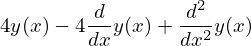

In [97]:
eq=d(d(y(x),x),x)-4*d(y(x),x)+4*y(x);
eq

In [98]:
l=Symbol("l")
r=l**2-4*l+4
lamb=solve(r)
lamb

$\implies \lambda_{1,2}=2$

In [99]:
c1,c2=symbols("c1,c2")
allg=c1*x*E**(2*x)+c2*E**(2*x)
allgs=Eq(y(x),c1*x*E**(2*x)+c2*E**(2*x))
#a2=c1*x*E**(2*x)+c2*E**(2*x)
allgs

$y_h=c_1xe^{2x}+c_2e^{2x}$

#### 5.2.2.2 Spezielle Lösung
$y''-4y'+4y=e^{2x}$

Ansatz $y(x)=x^2Ae^{2x}$

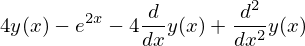

In [100]:
A=symbols("A")
ans=x**2*A*E**(2*x)
#ans=x*A*E**(2*x)
eq=d(d(y(x),x),x)-4*d(y(x),x)+4*y(x)-E**(2*x)
eq

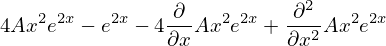

In [101]:
seq=eq.subs(y(x),ans)
seq

In [102]:
seq=seq.doit()
seq

In [103]:
seq.simplify()

In [104]:
#solve(seq,A)[0].doit().simplify()
solve(seq,A)

$A=0.5 \implies $

In [105]:
ys=ans.subs(A,1/2)
ys

$y=y_h+y_s \implies$

In [106]:
f=ys+allg
f

Überprüfung:

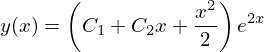

In [107]:
dsolve(eq)

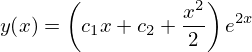

In [108]:
C1,C2=symbols("C1 C2")
ff=Eq(y(x),f)
res=dsolve(eq).subs(C2,c1).subs(C1,c2)
res

In [109]:
ff=ff.simplify()
ff

In [110]:
ff==res

True